In [128]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

pd.set_option('display.max_rows', None)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
# Read in the data

df = pd.read_csv(r'C:\Users\Admin\Desktop\Python\movies.csv')

In [31]:
#Let's look at the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [56]:
# Finding missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [55]:
# Count the number of missing budget value

df['budget'].isna().sum()

2171

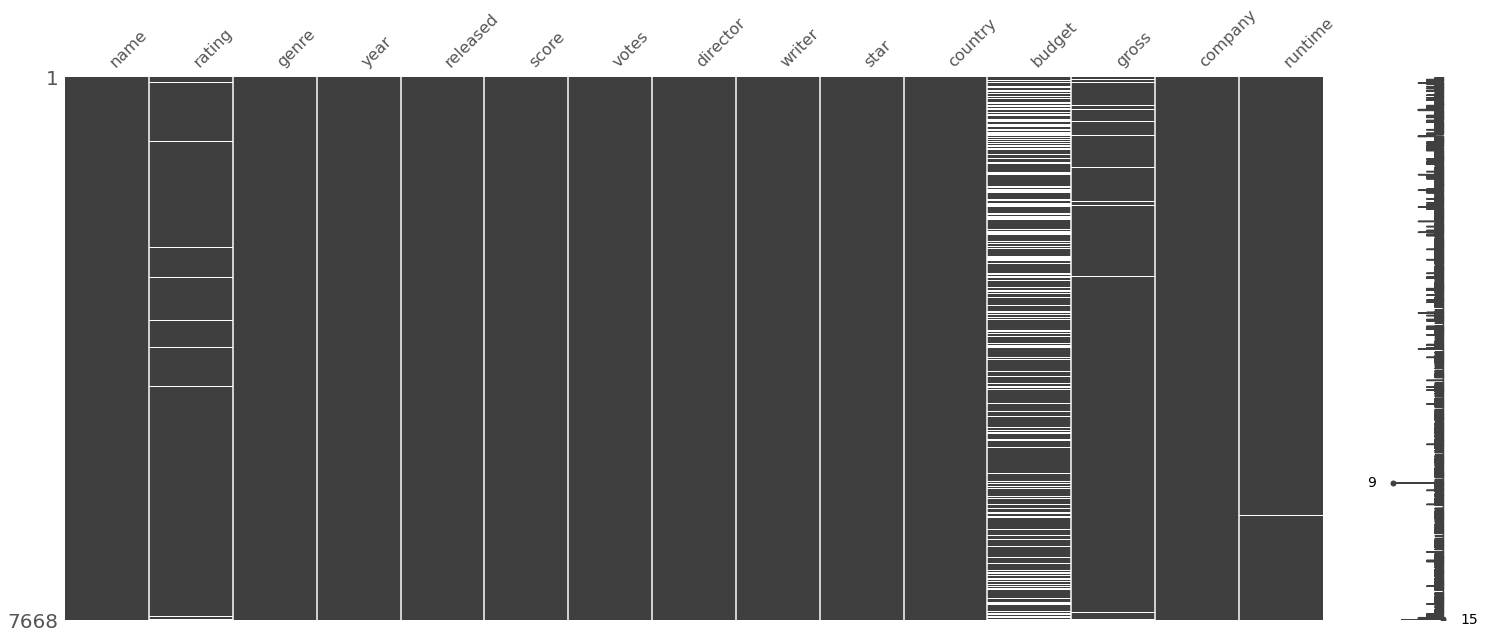

In [45]:
#Visualize the missing data

msno.matrix(df)
plt.show()

In [46]:
#we see that missing budget values are randomly scattered troughout the column, let's dig deeper
#Isolate missing and complete values aside

missing = df[df['budget'].isna()]
complete = df[~df['budget'].isna()]

In [47]:
#Describe complete DataFrame
complete.describe()

,year,score,votes,budget,gross,runtime
count,5497.00000,5494.000000,5.494000e+03,5.497000e+03,5.436000e+03,5495.000000
mean,2001.54648,6.385948,1.137758e+05,3.558988e+07,1.030045e+08,108.053685
std,10.62366,0.968827,1.835858e+05,4.145730e+07,1.871051e+08,18.168172
min,1980.00000,1.900000,1.800000e+01,3.000000e+03,3.090000e+02,55.000000
25%,1993.00000,5.800000,1.800000e+04,1.000000e+07,1.067412e+07,95.000000
50%,2002.00000,6.500000,5.200000e+04,2.050000e+07,3.671199e+07,105.000000
75%,2010.00000,7.000000,1.280000e+05,4.500000e+07,1.119478e+08,118.000000
max,2020.00000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [48]:
#Describe missing DataFrame
missing.describe()

,year,score,votes,budget,gross,runtime
count,2171.000000,2171.000000,2.171000e+03,0.0,2.043000e+03,2169.000000
mean,1997.516352,6.401704,2.315393e+04,NaN,1.330069e+07,105.254956
std,11.917771,0.969009,5.481697e+04,NaN,3.935595e+07,19.449220
min,1980.000000,1.900000,7.000000e+00,NaN,6.820000e+02,71.000000
25%,1987.000000,5.800000,2.800000e+03,NaN,9.172055e+05,93.000000
50%,1995.000000,6.500000,8.500000e+03,NaN,3.984669e+06,102.000000
75%,2008.000000,7.100000,2.400000e+04,NaN,1.299659e+07,112.000000
max,2020.000000,8.600000,1.100000e+06,NaN,9.770435e+08,366.000000


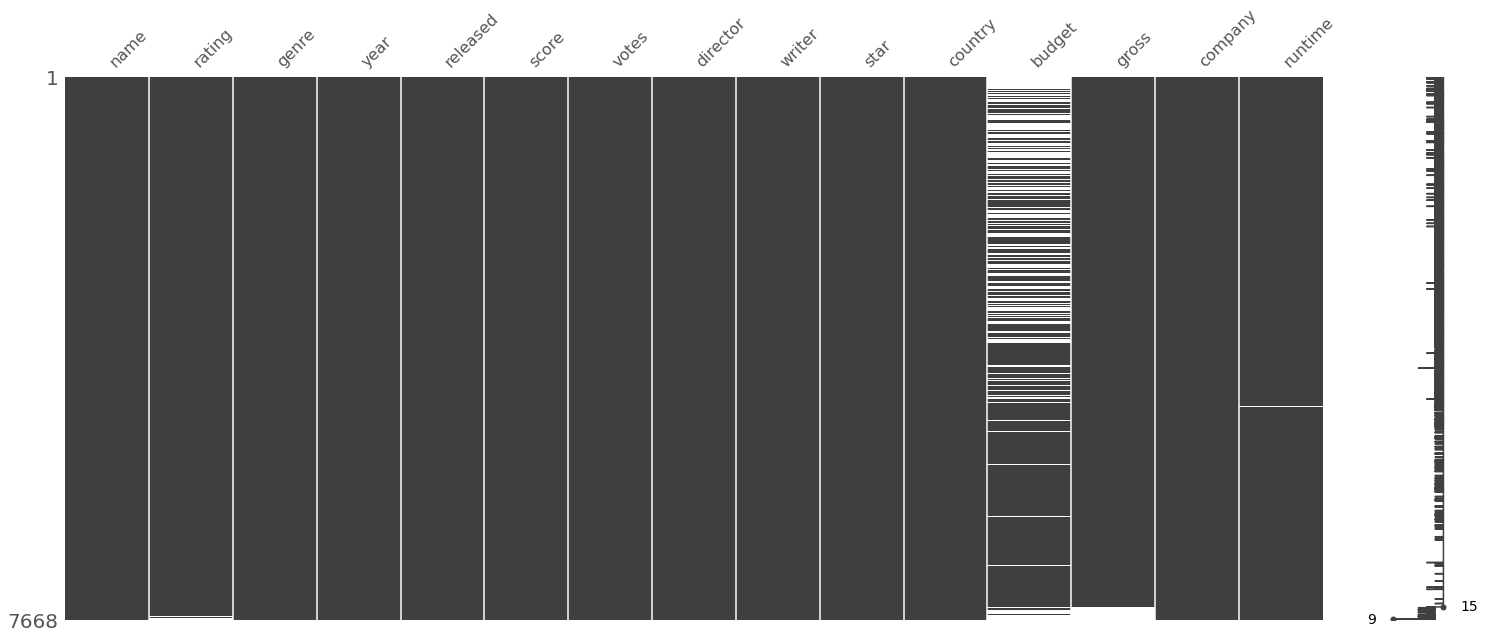

In [50]:
sorted_year = df.sort_values(by = 'gross')
msno.matrix(sorted_year)
plt.show()

###notice how missing values are on the top, this is because values are sorted from smallest gross to largest gross by default
### this essentially confirms that budgets tend to be lost for really low gross
### missing at ramdon

Text(0.5, 1.0, 'Histogram of Budget')

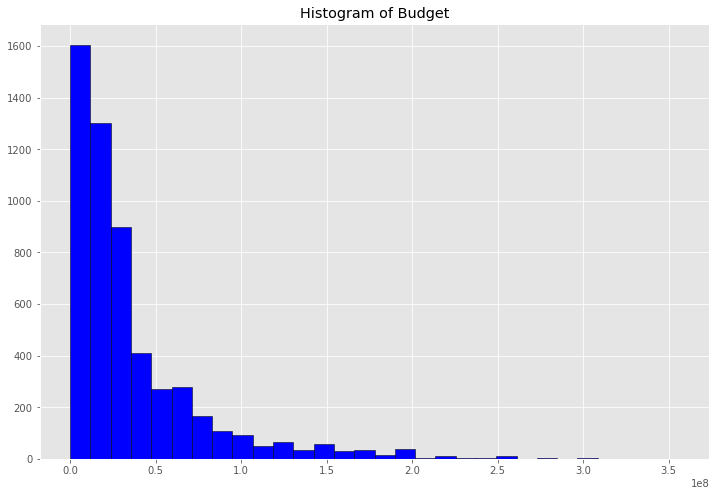

In [70]:
#### Plots histogram to check the distribution of budget

plt.hist(df['budget'], color = 'blue', edgecolor = 'black', bins = 30)
plt.title('Histogram of Budget')

In [68]:
#### from the plot we can see that the budget is skewed
#### Replacing missing budget values with the median of budget

budget_mean = df['budget'].median()
df_imputed = df.fillna({'budget': budget_mean})
df_imputed.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


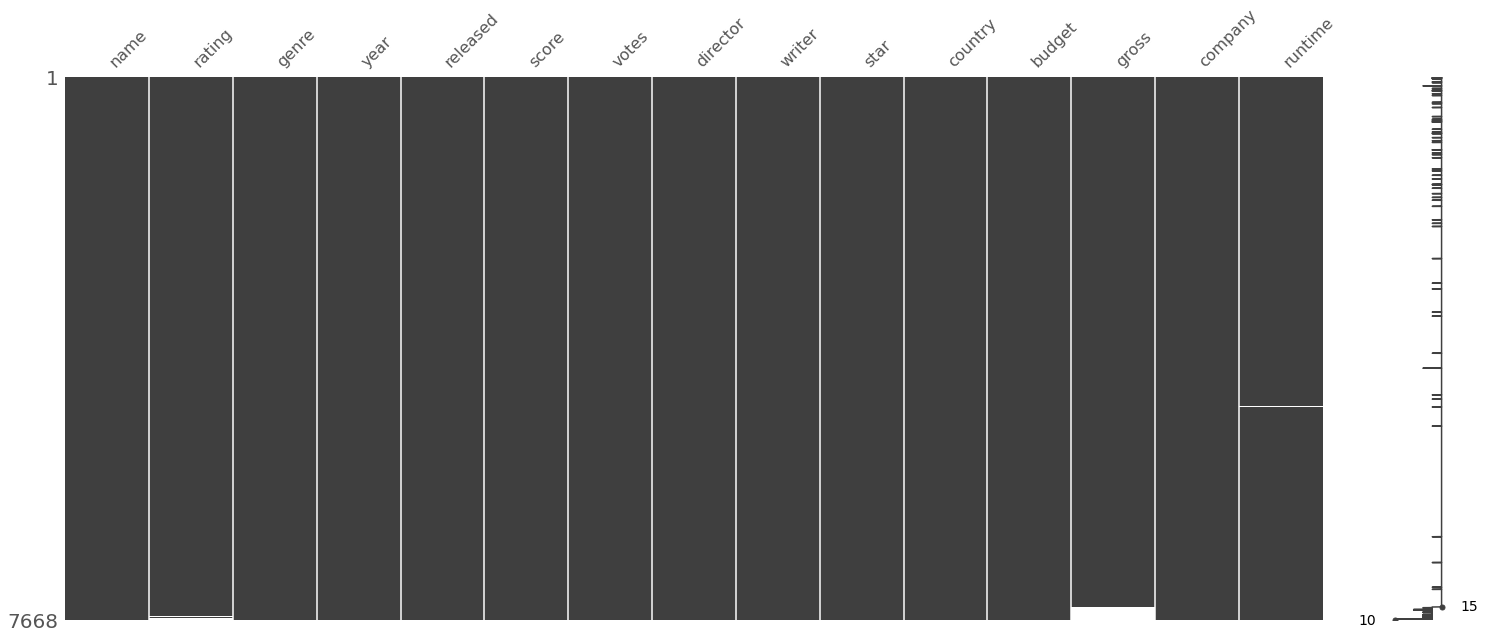

In [58]:
sorted_year = df_imputed.sort_values(by = 'gross')
msno.matrix(sorted_year)
plt.show()

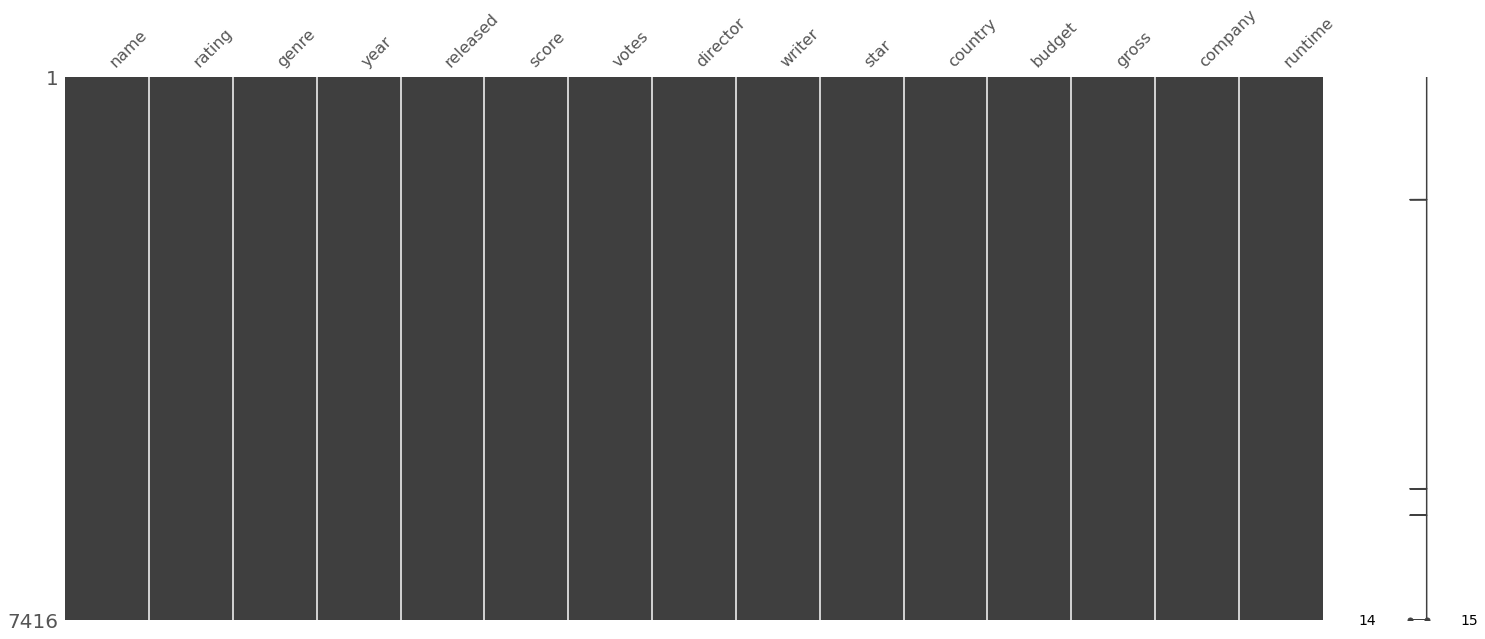

In [80]:
## Dropping missing values
columns = ['gross','rating','company']

df_cleaned = df_imputed.dropna(subset = columns)


## visualize the missing value
msno.matrix(df_cleaned)
plt.show()

In [98]:
# Data types for our columns
#convert rating, genre, budget and gross

df_cleaned['rating'].astype('category')

df_cleaned['genre'].astype('category')

df_cleaned['budget'].astype('int64')

df_cleaned['gross'].astype('int64')


#check the conversion
df_cleaned.dtypes

name          object
rating      category
genre       category
year           int64
released      object
score        float64
votes        float64
director      object
writer        object
star          object
country       object
budget         int64
gross          int64
company       object
runtime      float64
dtype: object

In [90]:
# Drop any duplicates

df_cleaned.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,20500000,3661,Prowess Pictures,98.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,20500000,240663149,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,20500000,413378,Pryor Entertainment,120.0


In [106]:
## Check if gross has negative values or not

df_cleaned[df_cleaned['gross'] < 0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [105]:
## These movies are actually highest-grossing films, replace the gross value with  the actual gross
df_cleaned.at[3045,'gross'] = 2207986545
df_cleaned.at[5445, 'gross'] = 2847246203
df_cleaned.at[7445, 'gross'] = 2797501328

In [91]:
## Budget high correlation
## Company high correlation
## Genre correlation

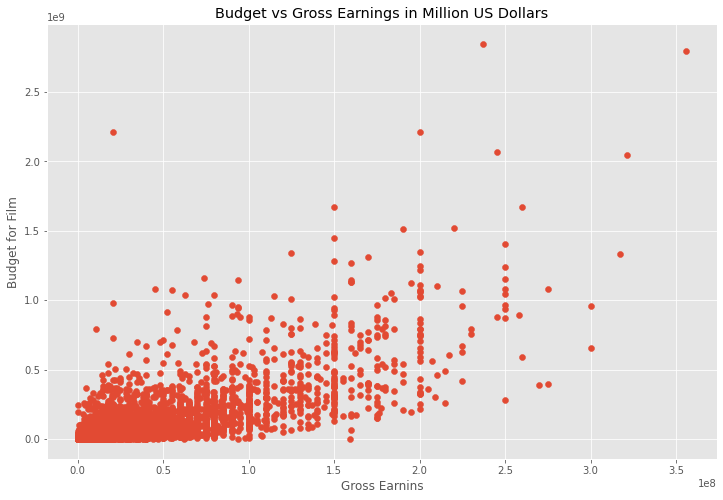

In [110]:
# Scatter plot with budget vs gross

plt.scatter(x = df_cleaned['budget'], y = df_cleaned['gross'])
plt.title('Budget vs Gross Earnings in Million US Dollars')

plt.xlabel('Gross Earnins')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

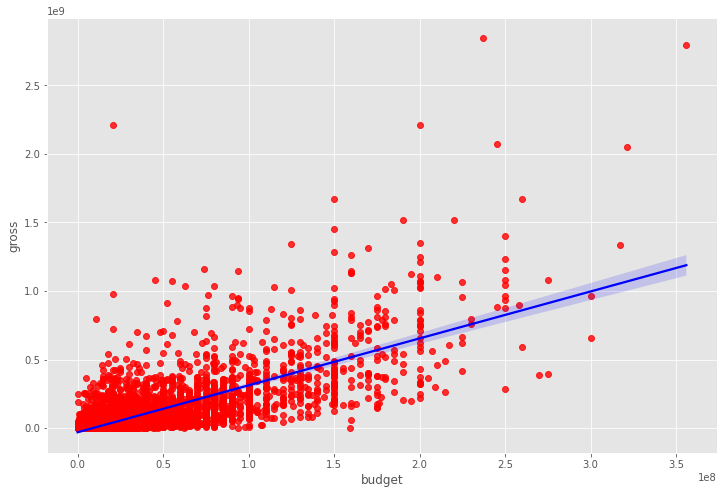

In [112]:
# Regression Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df_cleaned, scatter_kws = {'color': 'red'}, line_kws = {'color':'blue'})

In [113]:
# Looking at correlation (pearson)
df_cleaned.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.093866,0.218697,0.291828,0.255489,0.114364
score,0.093866,1.000000,0.415113,0.058900,0.183809,0.397218
votes,0.218697,0.415113,1.000000,0.457787,0.623208,0.309950
budget,0.291828,0.058900,0.457787,1.000000,0.737279,0.273730
gross,0.255489,0.183809,0.623208,0.737279,1.000000,0.242343
runtime,0.114364,0.397218,0.309950,0.273730,0.242343,1.000000


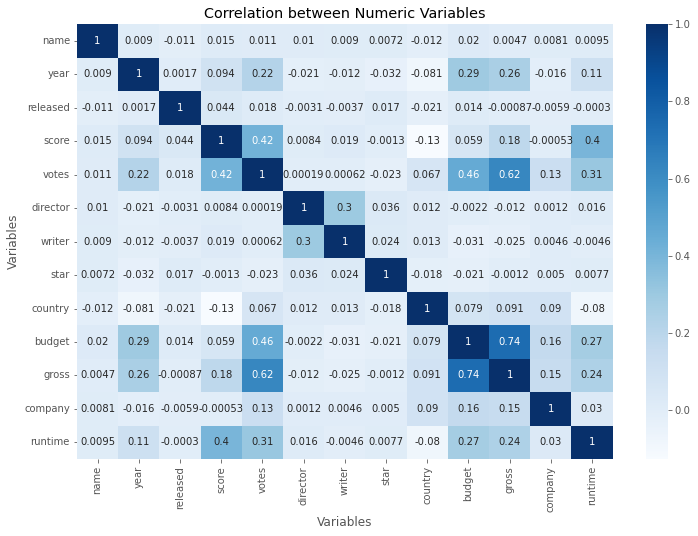

In [138]:
correlation_matrix = df_cleaned.corr()

sns.heatmap(correlation_matrix, annot= True, cmap = 'Blues')
plt.title('Correlation between Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()

In [118]:
#Replace all the categorical value with unique numbers for further correlation analysis

df_numerized = df_cleaned

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [121]:
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6375,R,Drama,1980,1656,8.4,927000.0,2471,3852,980,52,19000000,46998772,2182,146.0
1,5375,R,Adventure,1980,1447,5.8,65000.0,2169,1564,306,53,4500000,58853106,689,104.0
2,4958,PG,Action,1980,1720,8.7,1200000.0,1063,2464,1643,53,18000000,538375067,1449,124.0
3,277,PG,Comedy,1980,1447,7.7,221000.0,1248,1920,2113,53,3500000,83453539,1700,88.0
4,993,R,Comedy,1980,1496,7.3,108000.0,1010,499,387,53,6000000,39846344,1668,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5588,Not Rated,Action,2020,484,6.8,3700.0,1048,1602,2646,8,80000000,461421559,352,149.0
7653,6268,R,Crime,2020,90,5.4,2400.0,2404,3726,2301,53,20500000,3661,1789,98.0
7655,3077,TV-PG,Animation,2020,2725,6.6,1300.0,2591,-1,872,8,20500000,240663149,353,110.0
7656,6796,PG-13,Comedy,2020,1833,5.0,294.0,2399,3719,2242,53,20500000,413378,1791,120.0


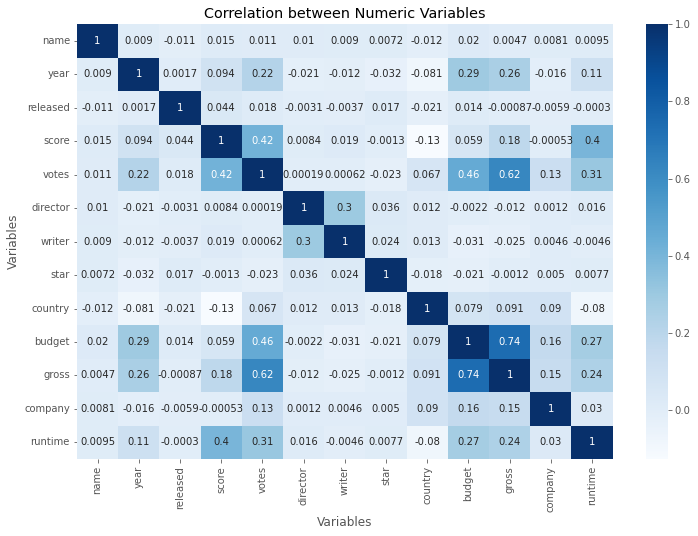

In [139]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot= True, cmap = 'Blues')
plt.title('Correlation between Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()

In [127]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          year        0.008965
          released   -0.010557
          score       0.015059
          votes       0.011324
          director    0.010489
          writer      0.008969
          star        0.007196
          country    -0.012313
          budget      0.019838
          gross       0.004678
          company     0.008077
          runtime     0.009492
year      name        0.008965
          year        1.000000
          released    0.001700
          score       0.093866
          votes       0.218697
          director   -0.020862
          writer     -0.012056
          star       -0.031615
          country    -0.080656
          budget      0.291828
          gross       0.255489
          company    -0.016231
          runtime     0.114364
released  name       -0.010557
          year        0.001700
          released    1.000000
          score       0.044405
          votes       0.018333
          director   -0.003135
        

In [129]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

score     country    -0.126527
country   score      -0.126527
          year       -0.080656
year      country    -0.080656
runtime   country    -0.079557
country   runtime    -0.079557
star      year       -0.031615
year      star       -0.031615
writer    budget     -0.030802
budget    writer     -0.030802
gross     writer     -0.025064
writer    gross      -0.025064
star      votes      -0.022677
votes     star       -0.022677
released  country    -0.021075
country   released   -0.021075
budget    star       -0.020944
star      budget     -0.020944
year      director   -0.020862
director  year       -0.020862
star      country    -0.018466
country   star       -0.018466
company   year       -0.016231
year      company    -0.016231
name      country    -0.012313
country   name       -0.012313
director  gross      -0.012069
gross     director   -0.012069
writer    year       -0.012056
year      writer     -0.012056
released  name       -0.010557
name      released   -0.010557
released

In [131]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.623208
votes     gross       0.623208
budget    gross       0.737279
gross     budget      0.737279
name      name        1.000000
writer    writer      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64